In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
import seaborn as sns
from scipy import stats 

# 3. Generate simulation study 

In [7]:
from opossum import UserInterface
random.seed(10)
#number of observations
n = 1000
#number of covariates
k = 10

## Experimental data simulation

<p> Simulation 1  </p>


In [8]:
"""
RCT Simulation 1 :

Positive and constant treatment effect
Linear relationship between treatment and outcome
Linear relationship between covariates

10 covariates 
4 categorical covariates 
    (1) Binary
    (2) Binaey
    (3) 8 categories 
    (4) 2 categories
"""
categorical_covs_1 = [4,[8,3]] # 4 categorical covariates , 2 binary , one with 8 categories and one with 3. 

# initilizing class
u = UserInterface(n, k, seed=1, categorical_covariates = categorical_covs_1)
# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.48, 
                     constant_pos = True, 
                     constant_neg = False,
                     heterogeneous_pos = False, 
                     heterogeneous_neg = False, 
                     no_treatment = False, 
                     discrete_heterogeneous = False,
                     treatment_option_weights = None, 
                     intensity = 5)
# generate output variable y and return all 4 variables
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'linear_simple')

y = pd.DataFrame(y)
X = pd.DataFrame(X)

X.columns=['X'+str(i) for i in range(0,k)]

assignment = pd.DataFrame(assignment)
treatment = pd.DataFrame(treatment)
covars = pd.DataFrame(X)

assignment.columns = ['assignment']
treatment.columns = ['treatment']
y.columns = ['outcome']

frames = [y,assignment,covars]
df_e = pd.concat(frames,axis=1)
# Save experiemntal dataset to csv file 
df_e.to_csv (r'/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/simulation_1_RCT.csv', index = True, header=True) 


"""
RCT Simulation 2 :
Positive and constant treatment effect
Linear relationship between treatment and outcome
Linear relationship between covariates

"""

# initilizing class
u = UserInterface(n, k, seed=1, categorical_covariates = categorical_covs_1)
# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.48, 
                     constant_pos = True, 
                     constant_neg = False,
                     heterogeneous_pos = False, 
                     heterogeneous_neg = False, 
                     no_treatment = False, 
                     discrete_heterogeneous = False,
                     treatment_option_weights = None, 
                     intensity = 5)

# generate output variable y and return all 4 variables
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'nonlinear_interaction')

y = pd.DataFrame(y)
X = pd.DataFrame(X)

X.columns=['X'+str(i) for i in range(0,k)]

assignment = pd.DataFrame(assignment)
treatment = pd.DataFrame(treatment)
covars = pd.DataFrame(X)

assignment.columns = ['assignment']
treatment.columns = ['treatment']
y.columns = ['outcome']

frames = [y,assignment,covars]
df_e = pd.concat(frames,axis=1)
# Save experiemntal dataset to csv file 
df_e.to_csv (r'/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/simulation_2_RCT.csv', index = True, header=True) 

## ODB simulation

In [9]:
"""
ODB Simulation 1 :

Positive and constant treatment effect
Linear relationship between treatment and outcome


10 covariates 
4 categorical covariates 
    (1) Binary
    (2) Binary
    (3) 8 categories 
    (4) 2 categories

"""

u = UserInterface(n, k, seed=1, categorical_covariates = categorical_covs_1)
# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = False, 
                     assignment_prob = 'medium', 
                     constant_pos = True, 
                     constant_neg = False,
                     heterogeneous_pos = False, 
                     heterogeneous_neg = False, 
                     no_treatment = False, 
                     discrete_heterogeneous = False,
                     treatment_option_weights = None, 
                     intensity = 5)
# generate output variable y and return all 4 variables
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'linear_simple')

y = pd.DataFrame(y)
X = pd.DataFrame(X)

X.columns=['X'+str(i) for i in range(0,k)]

assignment = pd.DataFrame(assignment)
treatment = pd.DataFrame(treatment)
covars = pd.DataFrame(X)

assignment.columns = ['assignment']
treatment.columns = ['treatment']
y.columns = ['outcome']
frames = [y,assignment,covars]

# Save experiemntal dataset to csv file 
df_o = pd.concat(frames,axis=1)
df_o.to_csv (r'/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/simulation_1_ODB.csv', index = True, header=True) 

"""
ODB Simulation 2 :

Positive and constant treatment effect
non-linear relationship between treatment and outcome

10 covariates 
4 categorical covariates 

    (1) Binary
    (2) Binary
    (3) 8 categories 
    (4) 2 categories

"""

u = UserInterface(n, k, seed=1, categorical_covariates = categorical_covs_1)
# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = False, 
                     assignment_prob = 'medium', 
                     constant_pos = True, 
                     constant_neg = False,
                     heterogeneous_pos = False, 
                     heterogeneous_neg = False, 
                     no_treatment = False, 
                     discrete_heterogeneous = False,
                     treatment_option_weights = None, 
                     intensity = 2)
# generate output variable y and return all 4 variables
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'nonlinear_interaction')

y = pd.DataFrame(y)
X = pd.DataFrame(X)

X.columns=['X'+str(i) for i in range(0,k)]

assignment = pd.DataFrame(assignment)
treatment = pd.DataFrame(treatment)
covars = pd.DataFrame(X)

assignment.columns = ['assignment']
treatment.columns = ['treatment']
y.columns = ['outcome']
frames = [y,assignment,covars]

# Save experiemntal dataset to csv file 
df_o = pd.concat(frames,axis=1)
df_o.to_csv (r'/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/simulation_2_ODB.csv', index = True, header=True) 


# 4 Data analysis

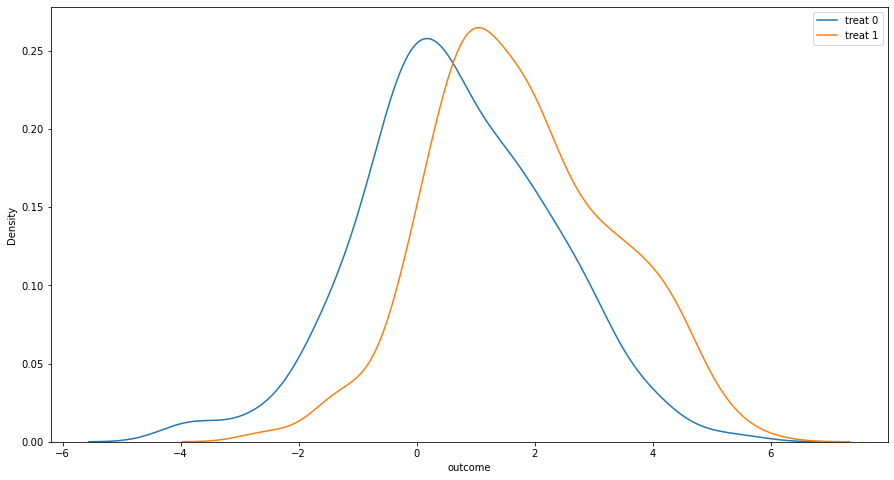

In [13]:
plt.figure(figsize=(15,8))
# Density plots for treatment and control
sns.kdeplot(data=df_e['outcome'][df_e['assignment']==0])
sns.kdeplot(data=df_e['outcome'][df_e['assignment']==1])
plt.legend(labels=["treat 0","treat 1"])

In [14]:
import scipy.stats as stat
import pylab 
from tueplots import axes, bundles , figsizes, fonts,fontsizes

#### Q-Q plot
def plot_data(df,feature,title):
    # neat plot 
    plt.rcParams.update({"figure.dpi": 150}) 
    plt.rcParams.update(bundles.neurips2022())
    plt.rcParams.update(fonts.neurips2022())
    plt.rcParams.update(axes.tick_direction( y="in"))
    plt.rcParams.update(axes.color(base="black"))
    plt.rcParams.update(figsizes.neurips2022(nrows=1, ncols=2))
    #historigram
    plt.figure(figsize=(4,3))
    plt.subplot(1,2,1)
    plt.grid(color='white', axis='y')
    plt.grid(color='white', axis='x')
    plt.tick_params(right='on')
    plt.tick_params(left='on')
    plt.tick_params(top='on')
    plt.title("Histogram")
    df[feature].hist(bins=20)
    #qq plot 
    plt.subplot(1,2,2)
    plt.grid(color='white', axis='y')
    plt.grid(color='white', axis='x')
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.suptitle(title)
    plt.show()

# PS estimation and matching


# Logistic regression

In [11]:
# Import libraries for LR
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

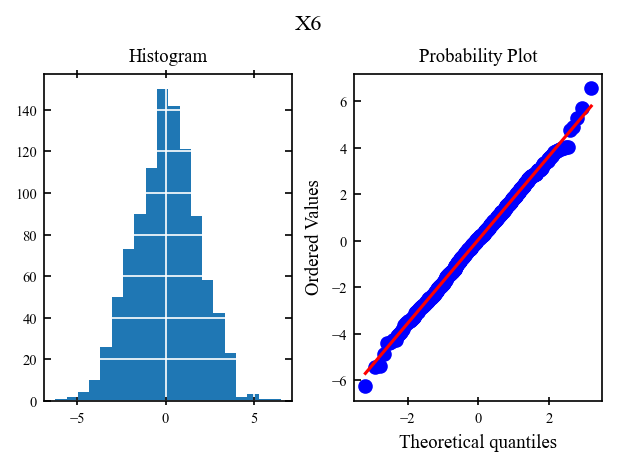

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 


plot_data(df_e,'X7',"X6")

#### Observational study DAG

In [12]:
import cdt
import networkx as nx
cdt.SETTINGS.rpath = '/Library/Frameworks/R.framework/Versions/4.0/Resources/Rscript'

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [13]:
# Skeleton graph
# Skeleton for full dataset
glasso = cdt.independence.graph.Glasso()
skeleton0 = glasso.predict(df_o)

# Skeleton for non-treated
treat0 = df_o[df_o['assignment']==0]
del treat0['assignment']
skeleton1 = glasso.predict(treat0)

# Skeleton for treated
treat1 = df_o[df_o['assignment']==1]
del treat1['assignment']
skeleton2 = glasso.predict(treat1)

In [14]:
graph_data_1 = df_o
graph_data_2 = treat0
graph_data_3 = treat1

# Full
model_pc0 = cdt.causality.graph.GES()
graph_pc0 = model_pc0.predict(graph_data_1, skeleton0)

# not treated
model_pc1 = cdt.causality.graph.PC()
graph_pc1 = model_pc1.predict(graph_data_2, skeleton1)

# Treat
model_pc2 = cdt.causality.graph.PC()
graph_pc2 = model_pc2.predict(graph_data_3, skeleton2)

#Plot all graphs
graphs = [graph_pc0,graph_pc1,graph_pc2]
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(30, 10))
ax = axes.flatten()
for i in range(3):
    nx.draw_networkx(graphs,font_size=10 ,node_size=500,edge_cmap='Reds',arrowsize=15,edge_color='Green' , ax=ax[i])

plt.show()

R Call errored, is R available ?


FileNotFoundError: [Errno 2] No such file or directory: '/Library/Frameworks/R.framework/Versions/4.0/Resources/Rscript'

In [11]:

glasso = cdt.independence.graph.Glasso()
skeleton0 = glasso.predict(df_o)
model_pc0 = cdt.causality.graph.PC()
graph_pc0 = model_pc0.predict(df_o, skeleton0)
nx.draw_networkx(graph_pc0,font_size=10 ,node_size=1000,edge_cmap='Reds',arrowsize=15,edge_color='Green')


NameError: name 'cdt' is not defined

In [79]:
from causalgraphicalmodels import CausalGraphicalModel

sprinkler = CausalGraphicalModel(
    nodes=["season", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("season", "rain"), 
        ("season", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)

sprinkler_G = sprinkler.graph


Springer_G = nx.to_numpy_matrix(sprinkler_G)
df_0_matrix = nx.to_numpy_matrix(graph_pc0)

nodes = graph_pc0.nodes
edges = graph_pc0.edges
nodes = list(nodes)
edges = list(edges)
edges.remove( ('X1', 'X0'))


sprinkler = CausalGraphicalModel(nodes=nodes,edges= edges )
#sprinkler.draw()

AssertionError: 

[('X0', 'X1'), ('X1', 'outcome'), ('outcome', 'X1')]

In [71]:
df_0_matrix

matrix([[0., 1., 0.],
        [1., 0., 1.],
        [0., 1., 0.]])

In [51]:
edges

OutEdgeView([('X0', 'X1'), ('X0', 'assignment'), ('X1', 'X0'), ('X1', 'assignment'), ('X1', 'outcome'), ('assignment', 'X0'), ('assignment', 'X1'), ('assignment', 'outcome'), ('outcome', 'X1'), ('outcome', 'assignment')])

In [17]:
# Convert variables to numpy arrays  

outcome_a  = np.array([df_e['outcome']])
assignment_a  = np.array([df_e['assignment']])
X0_a  = np.array([df_e['X0']])
X1_a = np.array(df_e['X1'])
X2_a = np.array(df_e['X2'])
X3_a = np.array(df_e['X3'])
X4_a = np.array(df_e['X4'])
X5_a = np.array(df_e['X5'])
X6_a = np.array(df_e['X6'])

# Reshape arrays 

outcome_a = outcome_a.reshape(722,1)
assignment_a = assignment_a.reshape(722,1)
X0_a = X0_a.reshape(722,1)
X1_a = X1_a.reshape(722,1)
X2_a = X2_a.reshape(722,1)
X3_a = X3_a.reshape(722,1)
X4_a = X4_a.reshape(722,1)
X5_a = X5_a.reshape(722,1)
X6_a = X6_a.reshape(722,1)


## Generate sets for conditional independence testing 

emptyset = [0]*722
emptyset = np.array(emptyset)
emptyset = emptyset.reshape(722,1)

# n-dimensional arrays

z_1 = np.array(df_e[['X0','X1','X2']])

In [13]:
from CCIT import CCIT
from CCIT import DataGen

In [19]:
ci_pvals = []
pvalue = CCIT.CCIT(outcome_a,assignment_a,emptyset) 
ci_pvals.append(pvalue)
ci_pvals

[0.5]